In [1]:
import logging

import shapely
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

from searvey import ioc

logging.basicConfig(
    level=20,
    style="{",
    format="{asctime:s}; {levelname:8s}; {threadName:23s}; {name:<25s} {lineno:5d}; {message:s}",
)

logging.getLogger("urllib3").setLevel(30)
logging.getLogger("parso").setLevel(30)

logger = logging.getLogger(__name__)

## Retrieve Station Metadata

In [8]:
ioc_stations = ioc.get_ioc_stations()
ioc_stations

,ioc_code,gloss_id,lat,lon,country,location,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_week,observations_ratio_per_week,observations_arrived_per_month,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,geometry
0,abas,327,44.020,144.290,Japan,Abashiri,SWJP40,Japan Meteorological Agency ( Japan ),ABASHIRI,2.29,...,10080,100,43150,43200.0,100,100,1',8',10',POINT (144.29000 44.02000)
1,abed,<NA>,57.140,-2.080,UK,Aberdeen,ftp,National Oceanography Centre ( UK ),NaN,1.36,...,672,100,2877,2880.0,100,100,15',22',15',POINT (-2.08000 57.14000)
2,abur,82,31.580,131.410,Japan,Aburatsu,SWJP40,Japan Meteorological Agency ( Japan ),ABURATSU,2.62,...,10080,100,43150,43200.0,100,100,1',8',10',POINT (131.41000 31.58000)
3,acaj,182,13.574,-89.838,El Salvador,Acajutla,SEMS40,Ministerio de Medio Ambiente y Recursos Natura...,50313520,-1.94,...,10080,89,42330,43200.0,98,99,1',3',5',POINT (-89.83800 13.57400)
4,acap,267,16.833,-99.917,Mexico,Acapulco,SEPA40,Centro de Investigación Científica y de Educac...,3540E15A,8.26,...,10080,0,-down-,NaN,0,0,1',NaN,5',POINT (-99.91700 16.83300)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,zhap,78,21.580,111.820,China,Zhapo,SZCI01,China Meteorological Administration ( China ),09731,1.90,...,10080,73,31565,43200.0,73,71,1',14',1',POINT (111.82000 21.58000)
1164,zihu,<NA>,17.637,-101.558,Mexico,"Zihuatanejo, Gro",ftp,Universidad Nacional Autónoma de México ( Mexi...,NaN,3.62,...,10080,100,43200,43200.0,100,100,1',18',15',POINT (-101.55800 17.63700)
1165,zihu2,<NA>,17.636,-101.558,Mexico,Zihuatanejo2,SOMX10,Universidad Nacional Autónoma de México ( Mexi...,0102D23E,3.65,...,10080,98,42900,43200.0,99,100,1',8',10',POINT (-101.55800 17.63600)
1166,zygi,<NA>,34.727,33.338,Cyprus,Zygi,ftp,Cyprus Oceanography Center ( Cyprus ),NaN,1.91,...,20160,0,-down-,NaN,0,0,0.5',NaN,1',POINT (33.33800 34.72700)


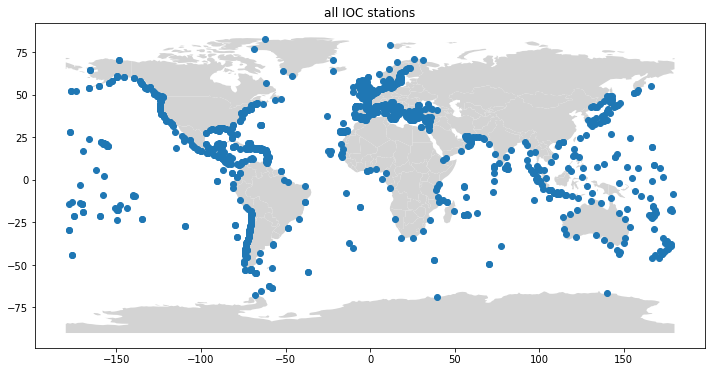

In [3]:
figure, axis = plt.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
_ = countries.plot(color='lightgrey', ax=axis, zorder=-1)
_ = ioc_stations.plot(ax=axis)
_ = axis.set_title(f'all IOC stations')

In [4]:
ioc_stations.columns

Index(['ioc_code', 'gloss_id', 'lat', 'lon', 'country', 'location',
       'connection', 'contacts', 'dcp_id', 'last_observation_level',
       'last_observation_time', 'delay', 'interval', 'added_to_system',
       'observations_arrived_per_week', 'observations_expected_per_week',
       'observations_ratio_per_week', 'observations_arrived_per_month',
       'observations_expected_per_month', 'observations_ratio_per_month',
       'observations_ratio_per_day', 'sample_interval',
       'average_delay_per_day', 'transmit_interval', 'geometry'],
      dtype='object')

## Retrieve station metadata from arbitrary polygon

In [9]:
east_coast = shapely.geometry.box(-85, 25, -65, 45)
east_coast

east_stations = ioc.get_ioc_stations(region=east_coast)
east_stations

,ioc_code,gloss_id,lat,lon,country,location,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_week,observations_ratio_per_week,observations_arrived_per_month,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,geometry
6,acnj,220,39.355,-74.418,USA,Atlantic City,web,National Ocean Service-NOAA ( USA ),3367B730,0.21,...,10080,99,43009,43200.0,100,100,1',7',5',POINT (-74.41800 39.35500)
7,acnj2,220,39.355,-74.418,USA,Atlantic City,SXXX03,National Ocean Service-NOAA ( USA ),3367B730,-8.61,...,10080,79,34630,43200.0,80,81,1',8',5',POINT (-74.41800 39.35500)
49,apfl,<NA>,29.727,-84.982,USA,Apalachicola,web,National Ocean Service-NOAA ( USA ),3346C2B4,1.87,...,10080,0,34211,43200.0,79,0,1',NaN,5',POINT (-84.98200 29.72700)
50,apfl2,<NA>,29.727,-84.982,USA,Apalachicola,SXXX03,National Ocean Service-NOAA ( USA ),3346C2B4,-6.07,...,10080,79,33925,43200.0,79,81,1',8',5',POINT (-84.98200 29.72700)
83,bamd,<NA>,39.267,-76.578,USA,Baltimore,web,National Ocean Service-NOAA ( USA ),336577DA,0.37,...,10080,17,7186,43200.0,17,17,1',5',5',POINT (-76.57800 39.26700)
84,bamd2,<NA>,39.267,-76.578,USA,Baltimore,SXXX03,National Ocean Service-NOAA ( USA ),336577DA,-4.13,...,10080,77,33960,43200.0,79,79,1',9',5',POINT (-76.57800 39.26700)
85,bame,<NA>,44.392,-68.205,USA,Bar Harbor,web,National Ocean Service-NOAA ( USA ),336747B4,1.55,...,10080,17,7198,43200.0,17,17,1',9',5',POINT (-68.20500 44.39200)
86,bame2,<NA>,44.392,-68.205,USA,Bar Harbor,SXXX03,National Ocean Service-NOAA ( USA ),336747B4,-4.67,...,10080,78,34335,43200.0,79,81,1',8',5',POINT (-68.20500 44.39200)
105,benc,<NA>,34.720,-76.670,USA,Beaufort,web,National Ocean Service-NOAA ( USA ),3364C6AE,0.02,...,10080,100,43060,43200.0,100,100,1',7',5',POINT (-76.67000 34.72000)
106,benc2,<NA>,34.720,-76.670,USA,Beaufort,SXXX03,National Ocean Service-NOAA ( USA ),3364C6AE,-4.09,...,10080,77,34065,43200.0,79,78,1',8',5',POINT (-76.67000 34.72000)


In [10]:
east_stations[~east_stations.contacts.str.contains("NOAA")]

,ioc_code,gloss_id,lat,lon,country,location,connection,contacts,dcp_id,last_observation_level,...,observations_expected_per_week,observations_ratio_per_week,observations_arrived_per_month,observations_expected_per_month,observations_ratio_per_month,observations_ratio_per_day,sample_interval,average_delay_per_day,transmit_interval,geometry
954,setp1,211,26.683,-78.983,Bahamas,Settlement pt,SEPO40,Bahamas Department of Meteorology ( Bahamas )+...,3543234A,2.87,...,10080,89,42201,43200.0,98,99,1',4',10',POINT (-78.98300 26.68300)


## Retrieve IOC station data

In [11]:
east_data = ioc.get_ioc_data(
    ioc_metadata=east_stations,
    endtime="2020-05-30",
    period=3,
)
east_data

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:11<00:00,  3.53it/s]


<xarray.Dataset>
Dimensions:   (ioc_code: 37, time: 4321)
Coordinates:
  * ioc_code  (ioc_code) object 'acnj' 'acnj2' 'apfl' ... 'setp1' 'wood' 'wood2'
  * time      (time) datetime64[ns] 2020-05-27 ... 2020-05-30
Data variables:
    pwl       (ioc_code, time) float64 nan nan nan nan ... nan -3.898 -3.899
    lon       (ioc_code) float64 -74.42 -74.42 -84.98 ... -78.98 -70.67 -70.67
    lat       (ioc_code) float64 39.35 39.35 29.73 29.73 ... 26.68 41.52 41.52
    country   (ioc_code) object 'USA' 'USA' 'USA' ... 'Bahamas' 'USA' 'USA'
    location  (ioc_code) object 'Atlantic City' ... 'Woods Hole, MA'
    wls       (ioc_code, time) float64 1.035 1.035 1.036 1.033 ... nan nan nan
    prs       (ioc_code, time) float64 nan nan nan nan nan ... nan nan nan nan
    ra2       (ioc_code, time) float64 nan nan nan nan nan ... nan nan nan nan
    rad       (ioc_code, time) float64 nan nan nan nan nan ... nan nan nan nan

In [12]:
def drop_all_nan_vars(ds: xr.Dataset) -> xr.Dataset:
    for var in ds.data_vars:
        if ds[var].notnull().sum() == 0:
            ds = ds.drop_vars(var)
    return ds

ds = drop_all_nan_vars(east_data.sel(ioc_code="setp1"))
ds

<xarray.Dataset>
Dimensions:   (time: 4321)
Coordinates:
    ioc_code  <U5 'setp1'
  * time      (time) datetime64[ns] 2020-05-27 ... 2020-05-30
Data variables:
    lon       float64 -78.98
    lat       float64 26.68
    country   object 'Bahamas'
    location  object 'Settlement pt'
    prs       (time) float64 3.189 3.189 3.19 3.192 ... 3.2 3.206 3.204 3.201
    ra2       (time) float64 2.911 2.915 2.915 2.917 ... 2.921 2.918 2.914 2.911
    rad       (time) float64 6.264 6.263 6.264 6.264 ... 2.932 2.932 2.935 2.92

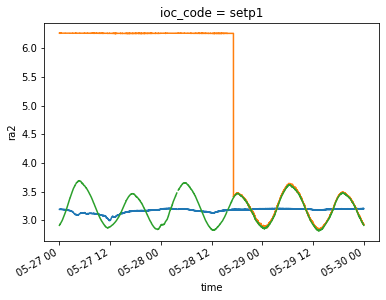

In [13]:
fix, axes = plt.subplots(1, 1)

_ = ds.prs.plot(ax=axes)
_ = ds.rad.plot(ax=axes)
_ = ds.ra2.plot(ax=axes)

In [16]:
bahamas = ds.where(ds.country == "Bahamas")
bahamas

<xarray.Dataset>
Dimensions:   (time: 4321)
Coordinates:
    ioc_code  <U5 'setp1'
  * time      (time) datetime64[ns] 2020-05-27 ... 2020-05-30
Data variables:
    lon       float64 -78.98
    lat       float64 26.68
    country   object 'Bahamas'
    location  object 'Settlement pt'
    prs       (time) float64 3.189 3.189 3.19 3.192 ... 3.2 3.206 3.204 3.201
    ra2       (time) float64 2.911 2.915 2.915 2.917 ... 2.921 2.918 2.914 2.911
    rad       (time) float64 6.264 6.263 6.264 6.264 ... 2.932 2.932 2.935 2.92

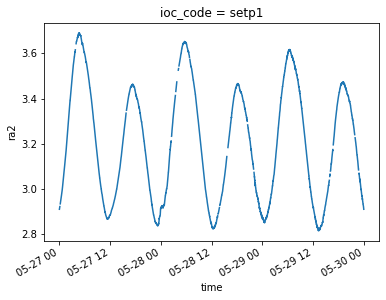

In [19]:
bahamas.ra2.plot()